# Part I - (FordGoBike Data Exploratory Analysis)

## by (Oluwadunsin Olajide)


## Introduction

Ford GoBike is the first bike-sharing system introduced in the US West Coast. Its 540 stations and 7,000 bikes sprawl across five cities in San Francisco Bay Area. The FordGoBike dataset will be used to carry out Exploratory and Explanatory analysis to find insights, patterns and trends from the dataset.

The following questions will be answered with the analysis;

1. How long do people used the bike based of their user_type?
2. when time do people use the bike the most?
3. Are there days that people do not use the bike at all?
4. Does the price reduction option increase the number of hours people can use the bike?
5. Do men use the bike system than females?
6. Which station has more user ?
7. Is the bike usage popular among a particular age range than the other?



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# load dataset

df_bike= pd.read_csv('201902-fordgobike-tripdata.csv')





### Assessment

In [3]:
df_bike.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

In [4]:

df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df_bike.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

The dataset consists of 183412 entries of Fordbike trips with 16 columns (duration_sec', 'start_time', 'end_time', 'start_station_id','start_station_name', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name','end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type','member_birth_year', 'member_gender', 'bike_share_for_all_trip).

The dataset contains some incorrect data types. some cleaning will be carried out to correct the datatypes and remove missing values from the dataset.
The start and end time data types will be changed from object to datatime ns, end_station_id to object, bike_id, start_station_id, end_station_id will be changed to object, bike_share_for_all_trip will be changed from object to boolean.
From the dataset, the start_hour, start_day_of_week and Period of the day will be gotten from the start time. The duration_min will be calculated from duration_sec by dividing the duration_sec by 60.( this is because the trip is priced in minutes, this will make the analysis easier when compared with the user_type). Member age will be calculated from member_birth_year by subracting member_birth_year from 2019 (which is the year under consideration).


### Cleaning 

In [6]:
# Make a copy of the dataset
df_biketrip = df_bike.copy()

In [7]:
df_biketrip.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [8]:
# Findng columns with null values
df_biketrip.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [9]:
# Remove rows with missing values
df_biketrip= df_biketrip.dropna()

In [10]:
df_biketrip.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [11]:
# Change the datatype for bike_id, start_station_id and end_station_id to object
df_biketrip['bike_id']= df_biketrip['bike_id'].astype('str')
df_biketrip['start_station_id']= df_biketrip['start_station_id'].astype('str')
df_biketrip['end_station_id']= df_biketrip['end_station_id'].astype('str')

In [12]:
df_biketrip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  object 
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  object 
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  object 
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [13]:
# Convert time variables from string to datetime
df_biketrip['start_time'] = pd.to_datetime(df_biketrip['start_time'])

# getting the day of the week from start time
df_biketrip['start_day_of_week'] = df_biketrip['start_time'].apply(lambda time: time.dayofweek)


In [14]:
df_biketrip.head()


duration_sec              start_time                  end_time  \
0         52185 2019-02-28 17:32:10.145  2019-03-01 08:01:55.9750   
2         61854 2019-02-28 12:13:13.218  2019-03-01 05:24:08.1460   
3         36490 2019-02-28 17:54:26.010  2019-03-01 04:02:36.8420   
4          1585 2019-02-28 23:54:18.549  2019-03-01 00:20:44.0740   
5          1793 2019-02-28 23:49:58.632  2019-03-01 00:19:51.7600   

  start_station_id                                start_station_name  \
0             21.0  Montgomery St BART Station (Market St at 2nd St)   
2             86.0                           Market St at Dolores St   
3            375.0                           Grove St at Masonic Ave   
4              7.0                               Frank H Ogawa Plaza   
5             93.0                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude end_station_id  \
0               37.789625              -122.400811           13.0   
2               37.769305              -122.426826            3.0   
3               37.774836              -122.446546           70.0   
4               37.804562              -122.271738          222.0   
5               37.770407              -122.391198          323.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   
5                            Broadway at Kearny             37.798014   

   end_station_longitude bike_id   user_type  member_birth_year member_gender  \
0            -122.402923    4902    Customer             1984.0          Male   
2            -122.404904    5905    Customer             1972.0          Male   
3            -122.444293    6638  Subscriber             1989.0         Other   
4            -122.248780    4898  Subscriber             1974.0          Male   
5            -122.405950    5200  Subscriber             1959.0          Male   

  bike_share_for_all_trip  start_day_of_week  
0                      No                  3  
2                      No                  3  
3                      No                  3  
4                     Yes                  3  
5                      No                  3

In [15]:
df_biketrip.bike_share_for_all_trip.value_counts()

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

In [16]:
df_biketrip.start_day_of_week.value_counts()

3    33712
1    30584
2    28426
4    27663
0    25641
6    14512
5    14414
Name: start_day_of_week, dtype: int64

In [17]:

# changing DayOfWeek to show name of the week and not number.

week_labels = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_biketrip['start_day_of_week'] = df_biketrip['start_day_of_week'].map(week_labels)


In [18]:
df_biketrip.start_day_of_week.value_counts()


Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: start_day_of_week, dtype: int64

In [19]:
df_biketrip['day_in_month'] = pd.DatetimeIndex(df_biketrip.start_time).day

In [20]:
df_biketrip.head()

duration_sec              start_time                  end_time  \
0         52185 2019-02-28 17:32:10.145  2019-03-01 08:01:55.9750   
2         61854 2019-02-28 12:13:13.218  2019-03-01 05:24:08.1460   
3         36490 2019-02-28 17:54:26.010  2019-03-01 04:02:36.8420   
4          1585 2019-02-28 23:54:18.549  2019-03-01 00:20:44.0740   
5          1793 2019-02-28 23:49:58.632  2019-03-01 00:19:51.7600   

  start_station_id                                start_station_name  \
0             21.0  Montgomery St BART Station (Market St at 2nd St)   
2             86.0                           Market St at Dolores St   
3            375.0                           Grove St at Masonic Ave   
4              7.0                               Frank H Ogawa Plaza   
5             93.0                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude end_station_id  \
0               37.789625              -122.400811           13.0   
2               37.769305              -122.426826            3.0   
3               37.774836              -122.446546           70.0   
4               37.804562              -122.271738          222.0   
5               37.770407              -122.391198          323.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   
5                            Broadway at Kearny             37.798014   

   end_station_longitude bike_id   user_type  member_birth_year member_gender  \
0            -122.402923    4902    Customer             1984.0          Male   
2            -122.404904    5905    Customer             1972.0          Male   
3            -122.444293    6638  Subscriber             1989.0         Other   
4            -122.248780    4898  Subscriber             1974.0          Male   
5            -122.405950    5200  Subscriber             1959.0          Male   

  bike_share_for_all_trip start_day_of_week  day_in_month  
0                      No          Thursday            28  
2                      No          Thursday            28  
3                      No          Thursday            28  
4                     Yes          Thursday            28  
5                      No          Thursday            28

In [21]:
df_biketrip["time_of_day"] = np.nan

In [22]:
# b. categorising the hours of the day to morning, afternoon, evening and night
df_biketrip['start_hour'] = df_biketrip['start_time'].apply(lambda time: time.hour)

df_biketrip['time_of_day'][(df_biketrip['start_hour'] >= 6) & (df_biketrip['start_hour'] <= 11)] = 'morning'
df_biketrip['time_of_day'][(df_biketrip['start_hour'] >= 12) & (df_biketrip['start_hour'] <= 17)] = 'afternoon'
df_biketrip['time_of_day'][(df_biketrip['start_hour'] >= 18) & (df_biketrip['start_hour'] <= 21)] = 'evening'
df_biketrip['time_of_day'][(df_biketrip['start_hour'] >= 22)] = 'night'
df_biketrip['time_of_day'][(df_biketrip['start_hour'] <= 5)] = 'night'


C:\Users\User\AppData\Local\Temp/ipykernel_6968/2369443246.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_biketrip['time_of_day'][(df_biketrip['start_hour'] >= 6) & (df_biketrip['start_hour'] <= 11)] = 'morning'
C:\Users\User\AppData\Local\Temp/ipykernel_6968/2369443246.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_biketrip['time_of_day'][(df_biketrip['start_hour'] >= 12) & (df_biketrip['start_hour'] <= 17)] = 'afternoon'
C:\Users\User\AppData\Local\Temp/ipykernel_6968/2369443246.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

In [23]:
#Convert duration_sec to duration_min
df_biketrip['duration_min']= df_biketrip['duration_sec']/60

In [24]:
df_biketrip.time_of_day.value_counts()

afternoon    67018
morning      64386
evening      36153
night         7395
Name: time_of_day, dtype: int64

In [25]:
# Getting the age of the members
df_biketrip['member_age'] = df_biketrip['member_birth_year'].apply(lambda x: 2019 - x)

In [26]:
df_biketrip['member_age']= df_biketrip['member_age'].apply(np.int64)

  

In [27]:
df_biketrip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  object        
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [28]:
# Storing the clean dataset
df_biketrip.to_csv('fordgobike_master.csv', index= False)

# Exploration

In [29]:
# Load the cleaned dataset
df_biketrip = pd.read_csv('fordgobike_master.csv')
df_biketrip.shape

(174952, 22)

In [30]:
df_biketrip.head()

duration_sec               start_time                  end_time  \
0         52185  2019-02-28 17:32:10.145  2019-03-01 08:01:55.9750   
1         61854  2019-02-28 12:13:13.218  2019-03-01 05:24:08.1460   
2         36490  2019-02-28 17:54:26.010  2019-03-01 04:02:36.8420   
3          1585  2019-02-28 23:54:18.549  2019-03-01 00:20:44.0740   
4          1793  2019-02-28 23:49:58.632  2019-03-01 00:19:51.7600   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              86.0                           Market St at Dolores St   
2             375.0                           Grove St at Masonic Ave   
3               7.0                               Frank H Ogawa Plaza   
4              93.0                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.769305              -122.426826             3.0   
2               37.774836              -122.446546            70.0   
3               37.804562              -122.271738           222.0   
4               37.770407              -122.391198           323.0   

                               end_station_name  end_station_latitude  ...  \
0                Commercial St at Montgomery St             37.794231  ...   
1  Powell St BART Station (Market St at 4th St)             37.786375  ...   
2                        Central Ave at Fell St             37.773311  ...   
3                         10th Ave at E 15th St             37.792714  ...   
4                            Broadway at Kearny             37.798014  ...   

    user_type  member_birth_year member_gender  bike_share_for_all_trip  \
0    Customer             1984.0          Male                       No   
1    Customer             1972.0          Male                       No   
2  Subscriber             1989.0         Other                       No   
3  Subscriber             1974.0          Male                      Yes   
4  Subscriber             1959.0          Male                       No   

  start_day_of_week day_in_month time_of_day  start_hour duration_min  \
0          Thursday           28   afternoon          17   869.750000   
1          Thursday           28   afternoon          12  1030.900000   
2          Thursday           28   afternoon          17   608.166667   
3          Thursday           28       night          23    26.416667   
4          Thursday           28       night          23    29.883333   

   member_age  
0          35  
1          47  
2          30  
3          45  
4          60  

[5 rows x 22 columns]

In [31]:
df_biketrip.describe()

duration_sec  start_station_id  start_station_latitude  \
count  174952.000000     174952.000000           174952.000000   
mean      704.002744        139.002126               37.771220   
std      1642.204905        111.648819                0.100391   
min        61.000000          3.000000               37.317298   
25%       323.000000         47.000000               37.770407   
50%       510.000000        104.000000               37.780760   
75%       789.000000        239.000000               37.797320   
max     84548.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            174952.000000   174952.000000         174952.000000   
mean               -122.351760      136.604486             37.771414   
std                   0.117732      111.335635              0.100295   
min                -122.453704        3.000000             37.317298   
25%                -122.411901       44.000000             37.770407   
50%                -122.398279      101.000000             37.781010   
75%                -122.283093      238.000000             37.797673   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year   day_in_month  \
count          174952.000000  174952.000000      174952.000000  174952.000000   
mean             -122.351335    4482.587555        1984.803135      15.312337   
std                 0.117294    1659.195937          10.118731       8.033926   
min              -122.453704      11.000000        1878.000000       1.000000   
25%              -122.411647    3799.000000        1980.000000       8.000000   
50%              -122.397437    4960.000000        1987.000000      15.000000   
75%              -122.286533    5505.000000        1992.000000      22.000000   
max              -121.874119    6645.000000        2001.000000      28.000000   

          start_hour   duration_min     member_age  
count  174952.000000  174952.000000  174952.000000  
mean       13.456165      11.733379      34.196865  
std         4.734282      27.370082      10.118731  
min         0.000000       1.016667      18.000000  
25%         9.000000       5.383333      27.000000  
50%        14.000000       8.500000      32.000000  
75%        17.000000      13.150000      39.000000  
max        23.000000    1409.133333     141.000000

### Structure of the dataset

The dataset contains information about first bike-sharing system in San Francisco Bay area in February, 2019. it has the total of 174952 entries of bike trips with 21 columns( the colums gives information about the duration in secs and mins each rider used the bike, start and end time,the day of the week and hours the users used the bike, start and end stations with their latitudes and longitudes, bike id, start and end stations ids, user type( i.e whether the user is a subscriber or customer), bike_share_for_all_trip (this column indicate whether the user is registered for the reduced pricing option), the gender and age. 

The dataset can be didvided into categorical and numerical variables.

Numerical variables are the ones with float or integer datatypes. there are 12 numerical variables in all ( 8 (float64) and 4 (int64)).
Categorical are varaibles with string or boolean datatypes. There are 9 categorical variables in total (one boolean and 8 (object or string)).



### Main feature(s) of interest in the dataset
I am interested in finding features that are key in determining whether a bike user will subscribe or remain as customer.




### Features in the dataset that will help support  investigation into  feature(s) of interest

The following features in the dataset will help answer the questions posed above;
1. Duration_min
2. Start and end_station
3. Start_day_of_week
4. start_hour
5. member_age
6. member_gender
7. User_type
8. bike_share_for_all_trip

## Univariate Exploration


#### Which day of the week has the highest number of trips?

In [32]:
sb.color_palette()


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

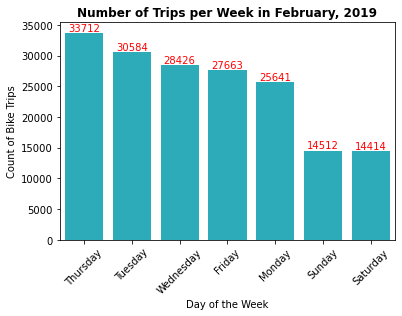

In [33]:

base_color= sb.color_palette()[9]
week_order = df_biketrip['start_day_of_week'].value_counts().index
splot=sb.countplot(data=df_biketrip, x='start_day_of_week', color=base_color, order= week_order);
plt.xticks(rotation=45)
plt.bar_label(splot.containers[0],size=10,label_type='edge', color='red')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Bike Trips')
plt.title('Number of Trips per Week in February, 2019', fontweight='bold');

The highest bike trip was recorded on Thursday with 33712 trips with the lowest trip on Saturday and Sunday. It appears that people tend to rest during the weekend and go out less often. I can also infer that majority of the people that used the bike system in february go to work majorly during the week and don't have weekend shift or don't work on weekends.

##### When in the day do users use the bike mostly?

In [34]:
base_color= sb.color_palette()[4]
user_order = df_biketrip['time_of_day'].value_counts().index
splot= sb.countplot(data=df_biketrip, x='time_of_day', color=base_color, order= user_order);
plt.bar_label(splot.containers[0],size=10,label_type='edge')
plt.xlabel('Period of the day')
plt.ylabel('Count of Bike Trips')
plt.title('Distribution of trips through the period of the day in February, 2019', fontweight='bold');

#### Does the bike trip depend on whether user is a subscriber or customer?

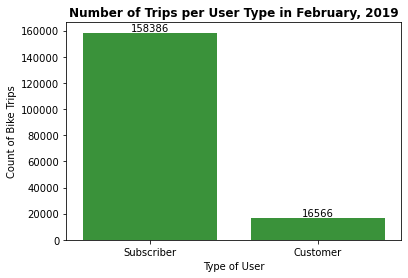

In [35]:
base_color= sb.color_palette()[2]
user_order = df_biketrip['user_type'].value_counts().index
splot= sb.countplot(data=df_biketrip, x='user_type', color=base_color, order= user_order);
plt.bar_label(splot.containers[0],size=10,label_type='edge')
plt.xlabel('Type of User')
plt.ylabel('Count of Bike Trips')
plt.title('Number of Trips per User Type in February, 2019', fontweight='bold');

The chart above shows that the highest number of trips were taken by the suscribers.Subscribers have a monthly or annual pass (i.e they have either paid for the bike usage for a month or year) while customers have a single-ride or day pass (i.e they pay for the bike usage daily).This makes sense because, subscriber pay less for the trip when compared to the amount paid by the customers. The subscribers don't have to pay unlock fee while the customers pay. Further visualization will be carried to see how often the subscribers uses the bike and how often the customers use the biking system.

###### Does the number of trip depend on gender?

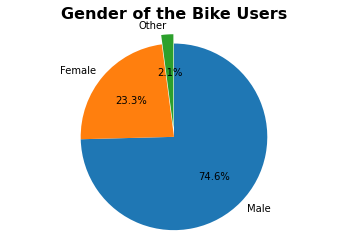

In [36]:
gender_counts= df_biketrip['member_gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',explode=[0,0,0.1], startangle=90, counterclock=False);
plt.title( 'Gender of the Bike Users', fontsize= 16, fontweight='bold');
plt.axis('equal');

The male users are three times more than the female users. The male users cover 74.6% of the overall bike users in February, 2019.

##### what is the relationship between bike share for all trip programs and the number of trips?

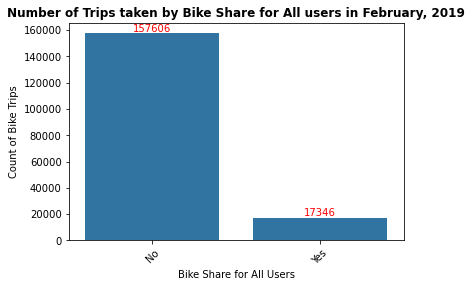

In [37]:
base_color= sb.color_palette()[0]
share_order = df_biketrip['bike_share_for_all_trip'].value_counts().index
splot=sb.countplot(data=df_biketrip, x='bike_share_for_all_trip', color=base_color, order= share_order);
plt.xticks(rotation=45);
plt.bar_label(splot.containers[0],size=10,label_type='edge', color='red')
plt.xlabel('Bike Share for All Users')
plt.ylabel('Count of Bike Trips')
plt.title('Number of Trips taken by Bike Share for All users in February, 2019', fontweight='bold');

Most of the bike users did not register for the bike share for all scheme. I will check further to know the category of users who uses the scheme and the time they make use of the bike.

##### What is the number of trip recorded at each Start station and end station?

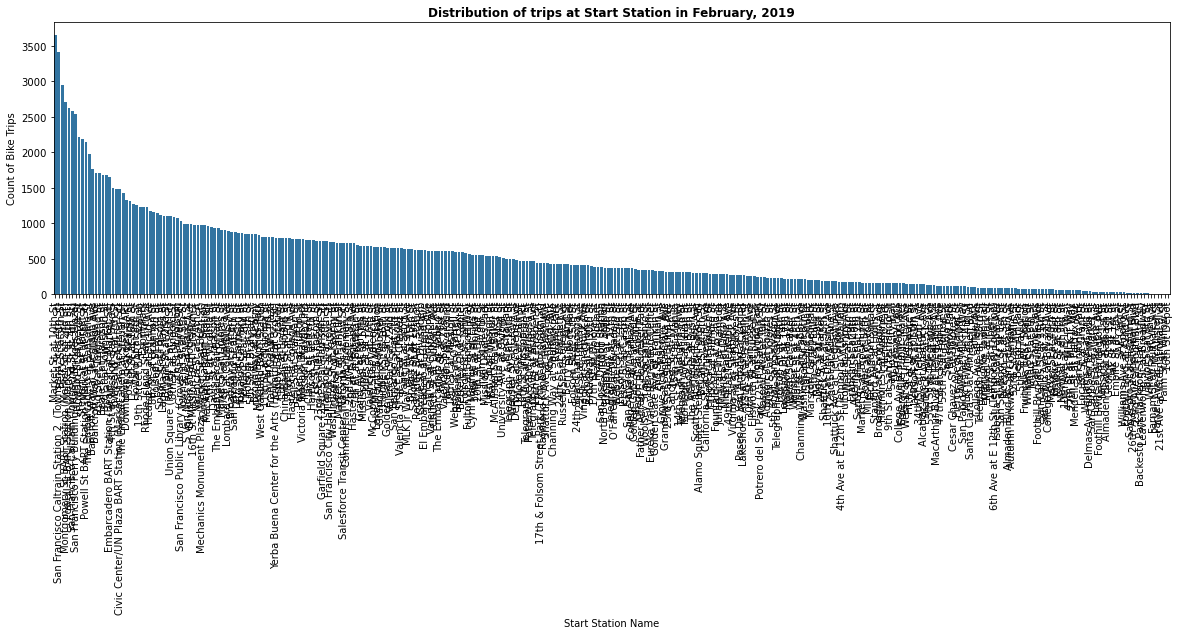

In [38]:
plt.figure(figsize=[20,5])
base_color= sb.color_palette()[0]
share_order = df_biketrip['start_station_name'].value_counts().index
sb.countplot(data=df_biketrip, x='start_station_name', color=base_color, order= share_order);
plt.xticks(rotation=90);
plt.xlabel('Start Station Name')
plt.ylabel('Count of Bike Trips')
plt.title('Distribution of trips at Start Station in February, 2019', fontweight='bold');

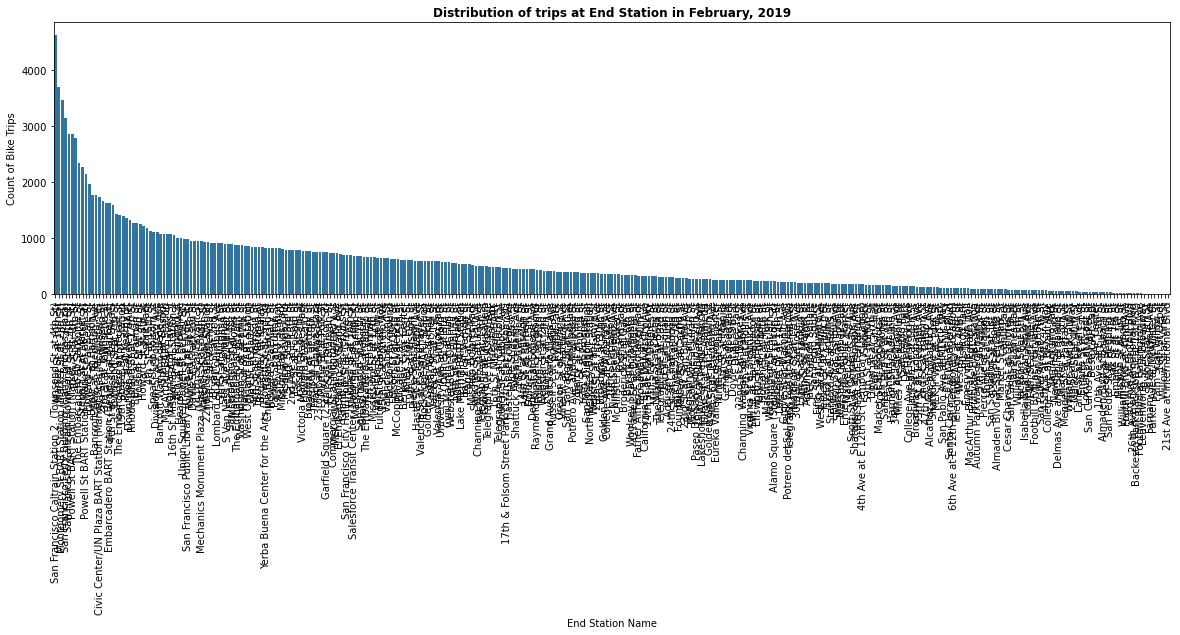

In [39]:
plt.figure(figsize=[20,5])
base_color= sb.color_palette()[0]
share_order = df_biketrip['end_station_name'].value_counts().index
sb.countplot(data=df_biketrip, x='end_station_name', color=base_color, order= share_order);
plt.xticks(rotation=90);
plt.xlabel('End Station Name')
plt.ylabel('Count of Bike Trips')
plt.title('Distribution of trips at End Station in February, 2019', fontweight='bold');

The trend in the start station and end station charts is the same. It indicates that the users ended their trip at the end station just as they started it. The chart looks so clumsy, to correct that I am going to reduce the plot to station with more than 1400 trips.

In [40]:
# Getting the top 20 stations 
df= df_biketrip['start_station_name'].value_counts().head(20)
df.index

Index(['Market St at 10th St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Berry St at 4th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Powell St BART Station (Market St at 4th St)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Howard St at Beale St', 'Steuart St at Market St',
       'Powell St BART Station (Market St at 5th St)',
       'The Embarcadero at Sansome St', 'Bancroft Way at Telegraph Ave',
       'Bancroft Way at College Ave', '2nd St at Townsend St',
       'Beale St at Harrison St', '3rd St at Townsend St',
       'Embarcadero BART Station (Beale St at Market St)',
       '4th St at Mission Bay Blvd S', 'Townsend St at 7th St',
       'Civic Center/UN Plaza BART Station (Market St at McAllister St)'],
      dtype='object')

In [41]:
#Creating a subset of the top 20 startion names 
locs= ['Market St at 10th St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Berry St at 4th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Powell St BART Station (Market St at 4th St)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Howard St at Beale St', 'Steuart St at Market St',
       'Powell St BART Station (Market St at 5th St)',
       'The Embarcadero at Sansome St', 'Bancroft Way at Telegraph Ave',
       'Bancroft Way at College Ave', '2nd St at Townsend St',
       'Beale St at Harrison St', '3rd St at Townsend St',
       'Embarcadero BART Station (Beale St at Market St)',
       '4th St at Mission Bay Blvd S', 'Townsend St at 7th St',
       'Civic Center/UN Plaza BART Station (Market St at McAllister St)']

df_topbiketrip= df_biketrip.loc[df_biketrip['start_station_name'].isin(locs)]

In [42]:
df_topbiketrip['start_station_name'].value_counts()


Market St at 10th St                                               3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)          3408
Berry St at 4th St                                                 2952
Montgomery St BART Station (Market St at 2nd St)                   2711
Powell St BART Station (Market St at 4th St)                       2620
San Francisco Caltrain (Townsend St at 4th St)                     2577
San Francisco Ferry Building (Harry Bridges Plaza)                 2541
Howard St at Beale St                                              2216
Steuart St at Market St                                            2191
Powell St BART Station (Market St at 5th St)                       2144
The Embarcadero at Sansome St                                      1975
Bancroft Way at Telegraph Ave                                      1761
Bancroft Way at College Ave                                        1712
2nd St at Townsend St                                           

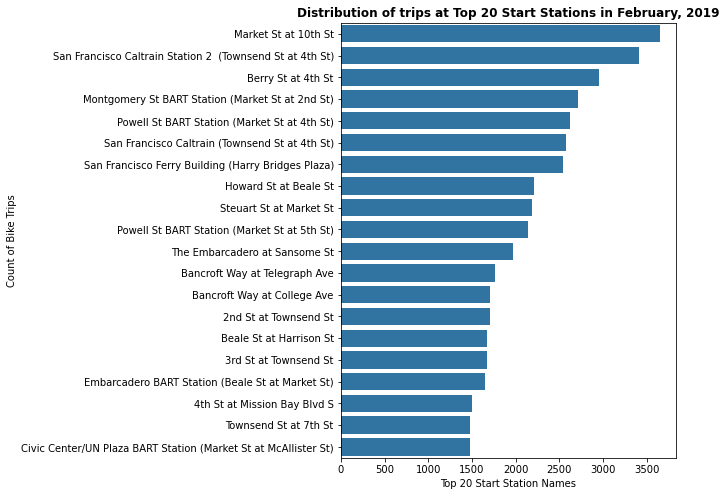

In [43]:
# plotting the count of trip in the top 20 Start stations
plt.figure(figsize=[6,8])
base_color= sb.color_palette()[0]
share_order = df_topbiketrip['start_station_name'].value_counts().index
sb.countplot(data=df_topbiketrip, y='start_station_name', color=base_color, order= share_order);
plt.xlabel('Top 20 Start Station Names')
plt.ylabel('Count of Bike Trips')
plt.title('Distribution of trips at Top 20 Start Stations in February, 2019', fontweight='bold');

Market St at 10th St station has the highest count of rides with the last three stations in the chart having the same number of rides.

In [44]:
# Getting the top 20 stations 
df= df_biketrip['end_station_name'].value_counts().head(20)
df.index

Index(['San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Market St at 10th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'Powell St BART Station (Market St at 4th St)', 'Berry St at 4th St',
       'The Embarcadero at Sansome St', 'Steuart St at Market St',
       'Powell St BART Station (Market St at 5th St)', 'Howard St at Beale St',
       'Beale St at Harrison St', 'Bancroft Way at Telegraph Ave',
       'Civic Center/UN Plaza BART Station (Market St at McAllister St)',
       '2nd St at Townsend St', '3rd St at Townsend St',
       'Embarcadero BART Station (Beale St at Market St)',
       '4th St at Mission Bay Blvd S', 'Townsend St at 7th St',
       'The Embarcadero at Steuart St'],
      dtype='object')

In [45]:
#Creating a subset of the top 20 startion names 
locs= ['San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Market St at 10th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'Powell St BART Station (Market St at 4th St)', 'Berry St at 4th St',
       'The Embarcadero at Sansome St', 'Steuart St at Market St',
       'Powell St BART Station (Market St at 5th St)', 'Howard St at Beale St',
       'Beale St at Harrison St', 'Bancroft Way at Telegraph Ave',
       'Civic Center/UN Plaza BART Station (Market St at McAllister St)',
       '2nd St at Townsend St', '3rd St at Townsend St',
       'Embarcadero BART Station (Beale St at Market St)',
       '4th St at Mission Bay Blvd S', 'Townsend St at 7th St',
       'The Embarcadero at Steuart St']

df_topbiketrip= df_biketrip.loc[df_biketrip['end_station_name'].isin(locs)]

In [46]:
df_topbiketrip['end_station_name'].value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)          4624
Market St at 10th St                                               3709
Montgomery St BART Station (Market St at 2nd St)                   3461
San Francisco Ferry Building (Harry Bridges Plaza)                 3151
San Francisco Caltrain (Townsend St at 4th St)                     2870
Powell St BART Station (Market St at 4th St)                       2854
Berry St at 4th St                                                 2782
The Embarcadero at Sansome St                                      2341
Steuart St at Market St                                            2264
Powell St BART Station (Market St at 5th St)                       2153
Howard St at Beale St                                              1970
Beale St at Harrison St                                            1780
Bancroft Way at Telegraph Ave                                      1780
Civic Center/UN Plaza BART Station (Market St at McAllister St) 

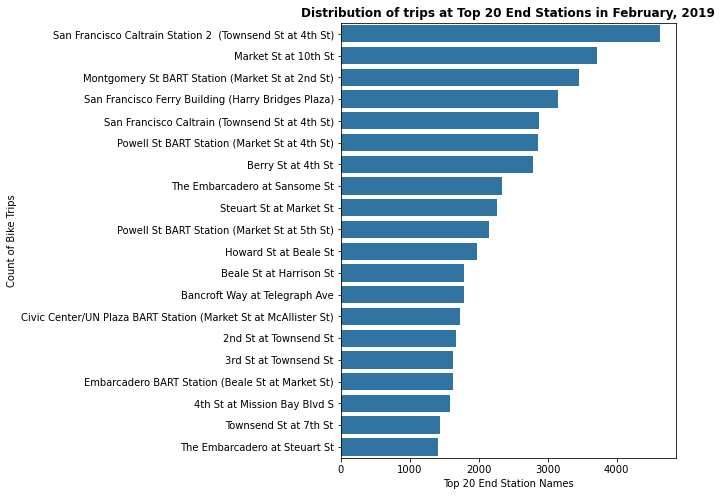

In [47]:
# plotting the count of trip in the top 20 Start stations
plt.figure(figsize=[6,8])
base_color= sb.color_palette()[0]
share_order = df_topbiketrip['end_station_name'].value_counts().index
sb.countplot(data=df_topbiketrip, y='end_station_name', color=base_color, order= share_order);
plt.xlabel('Top 20 End Station Names')
plt.ylabel('Count of Bike Trips')
plt.title('Distribution of trips at Top 20 End Stations in February, 2019', fontweight='bold');

San Francisco Caltrain Station 2  (Townsend St at 4th St) has the highest number of rides, that means more bike users ends their trip at this station when compared to the start station.

In [48]:
df_biketrip.member_age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

##### What is the age distribution of the bike users?

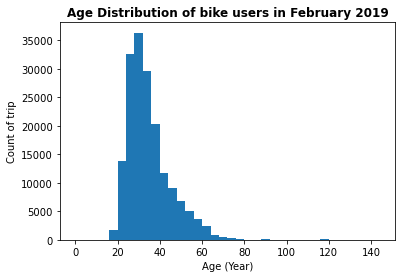

In [49]:
bins = np.arange(0,df_biketrip['member_age'].max()+4, 4)
plt.hist(data=df_biketrip, x='member_age', bins=bins);
plt.xlabel('Age (Year)')
plt.ylabel('Count of trip')
plt.title('Age Distribution of bike users in February 2019', fontweight='bold');

The age distribution appears skewed to the right. To get a clearer view, i will transform x-axis scale to a log-scale.

In [50]:
np.log10(df_biketrip['member_age'].describe())

count    5.242919
mean     1.533986
std      1.005126
min      1.255273
25%      1.431364
50%      1.505150
75%      1.591065
max      2.149219
Name: member_age, dtype: float64

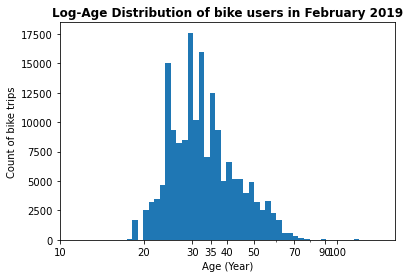

In [51]:
#scale transformation for x-axis to log-type
bins = 10**np.arange(1.2, 2.149 + 0.02, 0.02)
plt.hist(data=df_biketrip, x='member_age', bins= bins);
plt.xscale('log');
plt.xticks([10,20,30,35,40,50,70,90,100], [10,20,30,35,40,50,70,90,100]);
plt.xlabel('Age (Year)')
plt.ylabel('Count of bike trips')
plt.title('Log-Age Distribution of bike users in February 2019', fontweight='bold');

The figure shows multiple peaks with the highest peak around 30 years old users. the age range of users with the highest number of rides is between 30 - 40 years.

In [52]:
df_biketrip['duration_min'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

##### What is the duration of trips in minutes?

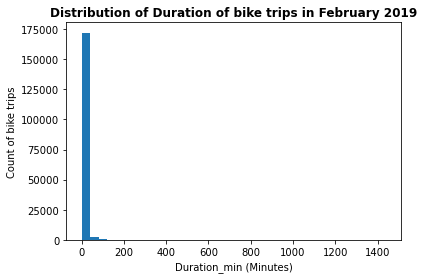

In [53]:
bins = np.arange(0,df_biketrip['duration_min'].max()+40, 40)
plt.hist(data=df_biketrip, x='duration_min', bins= bins);
plt.xlabel('Duration_min (Minutes)')
plt.ylabel('Count of bike trips')
plt.title('Distribution of Duration of bike trips in February 2019', fontweight='bold');


In [54]:
np.log10(df_biketrip['duration_min'].describe())

count    5.242919
mean     1.069423
std      1.437276
min      0.007179
25%      0.731051
50%      0.929419
75%      1.118926
max      3.148952
Name: duration_min, dtype: float64

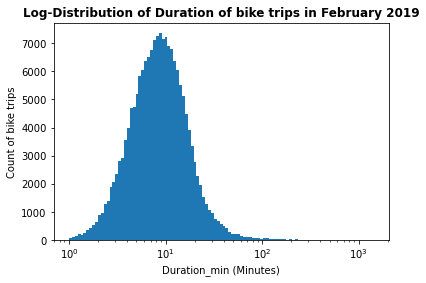

In [55]:
#scale transformation for x-axis to log-type
bins = 10**np.arange(0, 3.14 + 0.03, 0.03)
plt.hist(data=df_biketrip, x='duration_min', bins= bins);
plt.xscale('log');
plt.xticks=[0, 1, 3, 5, 7, 9, 11, 13,15,50,100,0.5e3,1e3,1.5e3],[0,'1','3','5','7','9','11','13','15','50','100','500','1k','1.5k']
plt.xlabel('Duration_min (Minutes)')
plt.ylabel('Count of bike trips')
plt.title('Log-Distribution of Duration of bike trips in February 2019', fontweight='bold');

The duration of time spent on the trips looks normally distributed with highest trip duration around 9-10 minutes.

In [56]:
df_biketrip['start_hour'].value_counts()

17    20904
8     20227
18    16118
9     15204
16    13473
7     10231
19     9424
15     8646
12     8220
13     8098
10     7970
14     7677
11     7461
20     6211
21     4400
6      3293
22     2793
23     1572
0       893
5       866
1       525
2       355
4       227
3       164
Name: start_hour, dtype: int64

##### What is the distribution of trips in February?

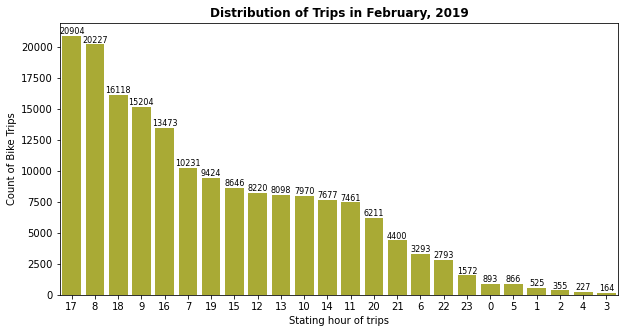

In [57]:
plt.figure(figsize=[10,5])
base_color= sb.color_palette()[8]
order = df_biketrip['start_hour'].value_counts().index
splot=sb.countplot(data=df_biketrip, x='start_hour', color=base_color, order= order)
plt.bar_label(splot.containers[0],size=8,label_type='edge', color='black')
plt.xlabel('Stating hour of trips')
plt.ylabel('Count of Bike Trips')
plt.title('Distribution of Trips in February, 2019', fontweight='bold');

The figure shows that most trip occurs in the morning by 8:00 and evening 5:00

In [58]:
df_biketrip['day_in_month'].value_counts()

28    9448
20    9246
21    9120
19    9096
7     8798
22    8765
6     8655
11    8315
12    8155
5     8136
27    7447
15    6977
25    6757
14    6346
8     6094
1     5827
18    5296
4     5273
26    5197
23    5128
24    4229
17    3877
16    3734
10    3697
13    3078
2     3003
3     2709
9     2549
Name: day_in_month, dtype: int64

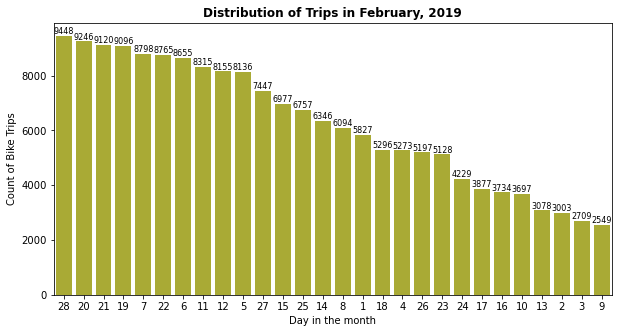

In [59]:
plt.figure(figsize=[10,5])
base_color= sb.color_palette()[8]
order = df_biketrip['day_in_month'].value_counts().index
splot=sb.countplot(data=df_biketrip, x='day_in_month', color=base_color, order= order)
plt.bar_label(splot.containers[0],size=8,label_type='edge', color='black')
plt.xlabel('Day in the month')
plt.ylabel('Count of Bike Trips')
plt.title('Distribution of Trips in February, 2019', fontweight='bold');

The last day of the month has the highest number of trip. we will probe further to know the time of the day most trip occurred in the month.


###### Number of trips per week
The highest bike trip was recorded on Thursday with 33712 trips with the lowest trip on Saturday and Sunday. It appears that people tend to rest during the weekend and go out less often. I can also infer that majority of the people that used the bike system in february go to work majorly during the week and don't have weekend shift or don't work on weekends.
###### Duration of bike trips
The distribution of the duration (minutes) of bike trips showed as a single bar in normal scale. Sacle transformation was performed which showed a normal distrbution after plotting.

###### Member age
Sacle transformation was performed changing the x-axis to log scale. unusual points was observed between users above 90 years, this age is above the life expectancy age of 79 years in USA as at 2019. The highest age in the data is 141 years, which looks almost impossible. it is a high outlier.
> 

Data Reduction

Plotting the count of trips at each start station, it lookes clumsy. I decided to reduce my observation for the station to the top 20 stations with at least 1400 trips in the month of February.


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [60]:
# writing out the numerical and categorical variables
numeric_vars = ['member_age', 'duration_min']
categorical_vars= ['start_day_of_week', 'time_of_day', 'start_hour', 'day_in_month', 'user_type', 'member_gender', 'bike_share_for_all']

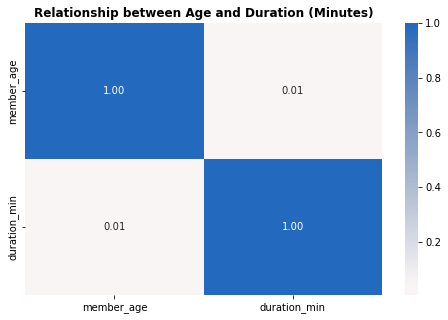

In [61]:
#plotting correlation for the numerical variables 
plt.figure(figsize = [8, 5])
sb.heatmap(df_biketrip[numeric_vars].corr(), annot = True, fmt = '.2f',cmap = 'vlag_r', center = 0)
plt.title('Relationship between Age and Duration (Minutes)', fontweight='bold');

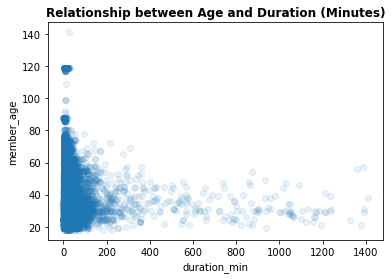

In [62]:

sb.regplot(data=df_biketrip, x='duration_min', y='member_age', fit_reg=False,truncate=False, x_jitter=0.3, scatter_kws ={'alpha': 1/10});
plt.title('Relationship between Age and Duration (Minutes)', fontweight='bold');

The duration of trips appear to reduce with increase in age.

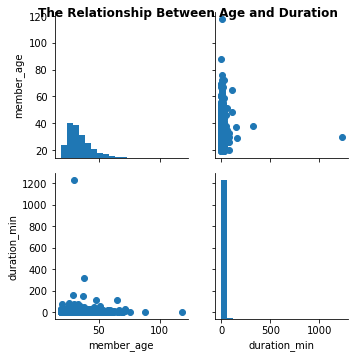

In [63]:
# sampling 1000 samples so for clearer plot
trip_sample = df_biketrip.sample(n=1000, replace = False)

chart = sb.PairGrid(data = trip_sample, vars = numeric_vars)
chart = chart.map_diag(plt.hist, bins = 20);
chart.map_offdiag(plt.scatter);
chart.fig.suptitle('The Relationship Between Age and Duration', fontweight='bold');

The major bike users in the month february falls with the age range of 30 - 40 years. The age is negatively (slightly) correlated with the duration of trips in minutes as there are less bike users within the older age group. This can be due to the fact that these age group go out less than the younger ones.

Relationship between user_type and the duration 
Relationship between duration and time of day,day of week and day of month

how often do the user_type use the bike
gender relationship and duration
bike share for all and user type

plt.xlabel('Day in the month')
plt.ylabel('Count of Bike Trips')

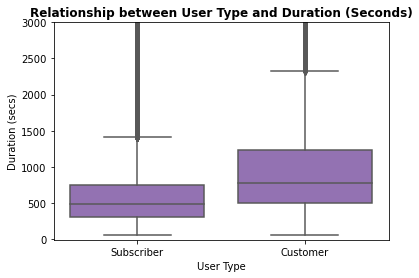

In [64]:
base_color= sb.color_palette()[4]
user_types=['Subscriber', 'Customer']
usertypes= pd.api.types.CategoricalDtype(ordered=True, categories=user_types)
df_biketrip['user_type']= df_biketrip['user_type'].astype(usertypes);
sb.boxplot(data=df_biketrip, x='user_type', y='duration_sec', color=base_color);
plt.ylim([-10,3000])
plt.xlabel('User Type')
plt.ylabel('Duration (secs)')
plt.title('Relationship between User Type and Duration (Seconds)', fontweight='bold');



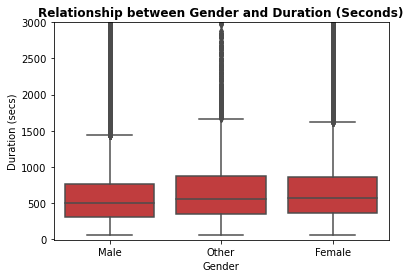

In [65]:
base_color= sb.color_palette()[3]
sb.boxplot(data=df_biketrip, x='member_gender', y='duration_sec', color=base_color);
plt.ylim([-10,3000])
plt.xlabel('Gender')
plt.ylabel('Duration (secs)')
plt.title('Relationship between Gender and Duration (Seconds)', fontweight='bold');

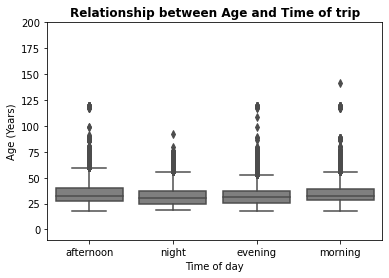

In [66]:
base_color= sb.color_palette()[7]
sb.boxplot(data=df_biketrip, x='time_of_day', y='member_age', color=base_color);
plt.ylim([-10,200])
plt.xlabel('Time of day')
plt.ylabel('Age (Years)')
plt.title('Relationship between Age and Time of trip', fontweight='bold');

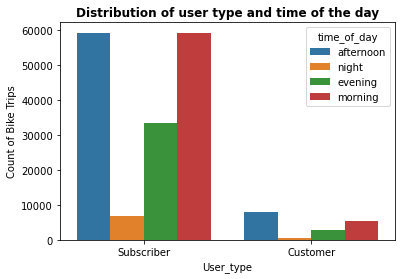

In [67]:
# Plotting the user type against the time of day the trip was taken.
sb.countplot(data=df_biketrip, x= 'user_type', hue='time_of_day');
plt.title('Distribution of user type and time of the day', fontweight='bold')
plt.xlabel('User_type')
plt.ylabel('Count of Bike Trips');




The figure shows that the subscribers use the bike most in the morning and afternoon while the customers use the bike system most in the afternoon.Maybe that explains why the customers remained as customers and didnt register because they dont use the bike often.

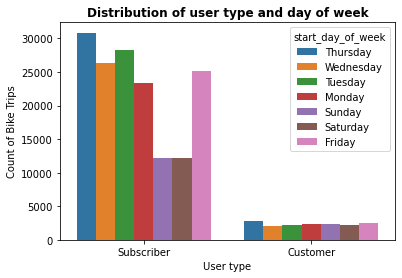

In [68]:
sb.countplot(data=df_biketrip, x= 'user_type', hue='start_day_of_week');
plt.title('Distribution of user type and day of week', fontweight='bold')
plt.xlabel('User type')
plt.ylabel('Count of Bike Trips');

Most subscriber use the bike system more during the week and less on Saturday and Sunday while the customers use the bike almost at the same rate on any day of the week.

In [69]:
df_biketrip.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_day_of_week', 'day_in_month', 'time_of_day', 'start_hour',
       'duration_min', 'member_age'],
      dtype='object')

In [70]:
sb.countplot(data=df_biketrip, x= 'user_type', hue='bike_share_for_all_trip');
plt.title('Distribution of user type and price reduction option', fontweight='bold')
plt.xlabel('User_type')
plt.ylabel('Count of Bike Trips');

None of the customers registered for the price reduction option(bike_share_for_all_trip).

### Insights from Bivariate Exploration

The major bike users in the month february falls with the age range of 30 - 40 years. The age is negatively (slightly) correlated with the duration of trips in minutes as there are less bike users within the older age group. This can be due to the fact that these age group go out less than the younger ones.

The customers have used the bike for a longer duration than the subscribers.
Most subscriber use the bike system more during the week and less on Saturday and Sunday while the customers use the bike almost at the same rate on any day of the week.
The bike usage is mostly used in the morning and afternoon. None of the customers registered for bike share for all trips option, this further explain that they dont us the bike system regularly and so they did not see reason to subscribe or register for the price reduction option.



## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Question: How long do older women or men use the bike comapred to the younger ones?

<Figure size 576x432 with 0 Axes>

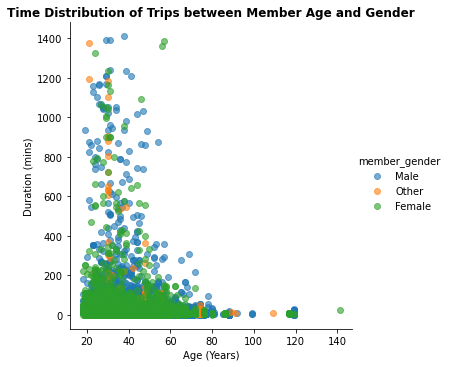

In [71]:
plt.figure(figsize=[8, 6])
g=sb.FacetGrid(data=df_biketrip, hue='member_gender', height=5)
g.map(plt.scatter, 'member_age', 'duration_min', alpha=0.6)
g.add_legend();
plt.xlabel('Age (Years)')
plt.ylabel('Duration (mins)');
plt.title('Time Distribution of Trips between Member Age and Gender', fontweight='bold');

There are more male bike users than female, the figure shows that both male and female are represented across the age distribution. Most trips between 5-40 mins.

Question: what is the relationship between the numerical variables and the time of day and weekdays?

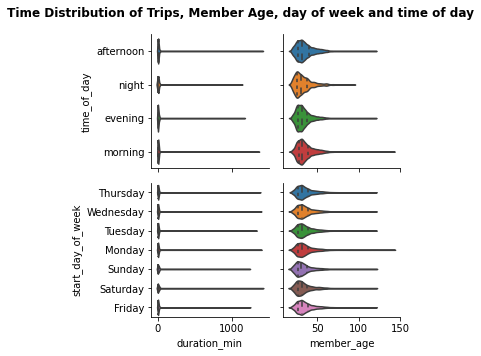

In [72]:
g=sb.PairGrid(data=df_biketrip, x_vars=['duration_min', 'member_age'], y_vars=['time_of_day', 'start_day_of_week'])
g.map(sb.violinplot, inner='quartile')
g.fig.suptitle('Time Distribution of Trips, Member Age, day of week and time of day', fontweight='bold');
g.fig.tight_layout()

There is no notable relationship member age and the time of trip.

In [73]:
Question: Does the user type determine the duration of trip and the time of trip?

Object `trip` not found.


In [ ]:
Question: Does the user type determine the duration of trip and the time of trip

<Figure size 1296x1296 with 0 Axes>

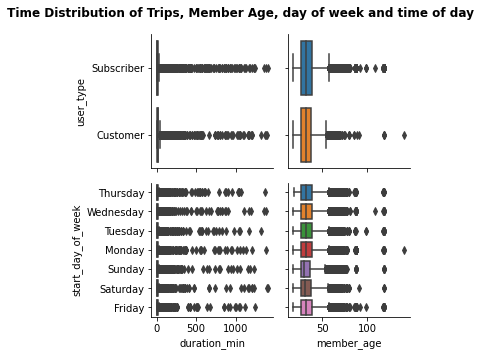

In [74]:
plt.figure(figsize = [18, 18])
g=sb.PairGrid(data=df_biketrip, x_vars=['duration_min', 'member_age'], y_vars=['user_type', 'start_day_of_week']);
g.map(sb.boxplot);
g.fig.suptitle('Time Distribution of Trips, Member Age, day of week and time of day', fontweight='bold');
g.fig.tight_layout()

Question: How does each user type and member age relate with the trip duration?

<Figure size 1296x1296 with 0 Axes>

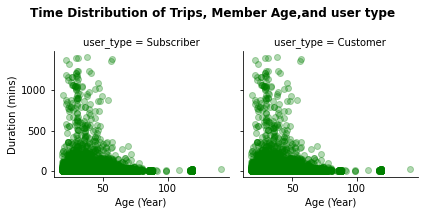

In [75]:
plt.figure(figsize = [18, 18])
g = sb.FacetGrid(data = df_biketrip, col = 'user_type')
g.map(plt.scatter,data = df_biketrip, x = 'member_age', y = 'duration_min', alpha= 0.3, color = 'green')
g.set_xlabels('Age (Year)')
g.set_ylabels('Duration (mins)');
g.fig.suptitle('Time Distribution of Trips, Member Age,and user type', fontweight='bold');
g.fig.tight_layout()


Insight from Multivariate Exploration

This investigation makes the relationship between the variables clearer. There are more male bike users than female, the figure shows that both male and female are represented across the age distribution. Most trips between 5-40 mins.
The customers and subscribers are showing the same trend for duration of trip. even though the subscribers ese thr bike system more, customers use the bike for a longer period of time per trip.



## Conclusions
Based on the investigation, the tendency that any one will subscribe to the bike system depends on how often they will use the bike and schedule. From the charts, the subscribers go out more on Monday through Friday which are working days, it depicts that most of the subscribers use the bike system to commute to work.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



### References

https://datavizpyr.com/annotate-barplot-with-bar_label-in-matplotlib/
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar_label.html
https://www.w3schools.com/python/matplotlib_bars.asp
https://en.wikipedia.org/wiki/Bay_Wheels
https://towardsdatascience.com/a-simple-yet-effective-5-step-framework-to-master-data-visualization-a1825e050c7c
https://www.google.com/search?q=life+expectancy+in+USA&oq=life+expectancy+in+USA&aqs=chrome..69i57j0i10l9.14427j0j7&sourceid=chrome&ie=UTF-8
https://stackoverflow.com/questions/57013731/how-to-avoid-the-overlapping-between-suptitle-and-subplots-when-using-python